In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-7'

In [2]:
corona_municipio =  pd.read_csv('data\\covid19_municipios.csv')
corona_municipio.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-03,AC,Acrelândia,city,9,0.0,True,15256.0,1200013.0,58.99318,NaN
1,2020-04-03,AC,Porto Acre,city,1,0.0,True,18504.0,1200807.0,5.40424,NaN
2,2020-04-03,AC,Rio Branco,city,36,0.0,True,407319.0,1200401.0,8.83828,NaN
3,2020-04-03,AC,NaN,state,46,0.0,True,881935.0,12.0,5.21580,NaN
4,2020-04-03,AL,Importados/Indefinidos,city,4,0.0,True,NaN,NaN,NaN,NaN


In [3]:
df = pd.DataFrame()
g_population = corona_municipio.groupby('city')
df['City'] = g_population['estimated_population_2019'].median().index
df['Population'] = g_population['estimated_population_2019'].median().values
df['Confirmed'] = g_population['confirmed'].sum().values
df['Deaths'] = g_population['deaths'].sum().values
df['Confirmed/100k'] = g_population['confirmed_per_100k_inhabitants'].median().values
df['Death rate'] = g_population['death_rate'].median().values
df.head()

,City,Population,Confirmed,Deaths,Confirmed/100k,Death rate
0,Abaetetuba,157698.0,4,0.0,0.634120,NaN
1,Acrelândia,15256.0,40,0.0,49.160985,NaN
2,Adamantina,35068.0,1,0.0,2.851600,NaN
3,Afonso Cláudio,30586.0,3,0.0,3.269470,NaN
4,Agudos,37214.0,2,0.0,2.687160,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
City              543 non-null object
Population        542 non-null float64
Confirmed         543 non-null int64
Deaths            543 non-null float64
Confirmed/100k    542 non-null float64
Death rate        87 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 23.4+ KB


In [5]:
df['City'].to_csv('data\\cities.csv', header=['City'])

Text(0.5, 1.0, 'Population distribuition')

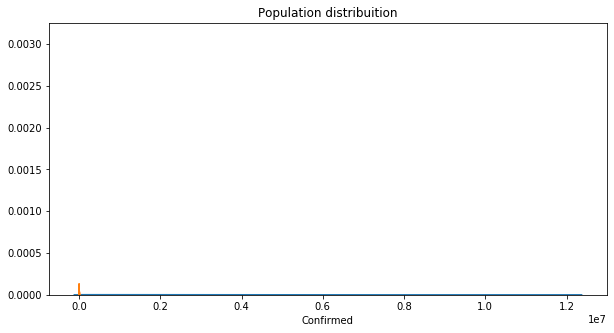

In [20]:
g = 1
col1 = 'Population'
col2 = 'Confirmed'
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col1].dropna()
)
plt.title(col1 + ' distribuition')
plt.savefig('data\\results\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

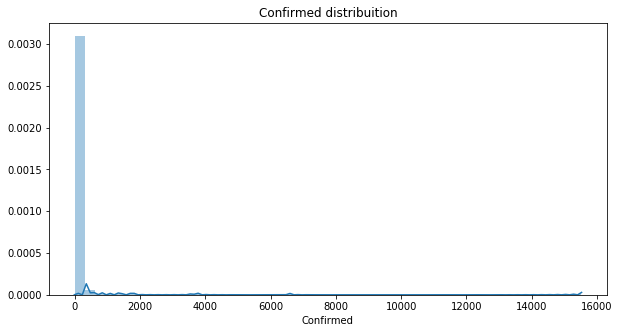

In [7]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col2].dropna()
)
plt.title(col2 + ' distribuition')
plt.savefig('data\\results\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

Text(0.5, 1.0, 'All data distribution')

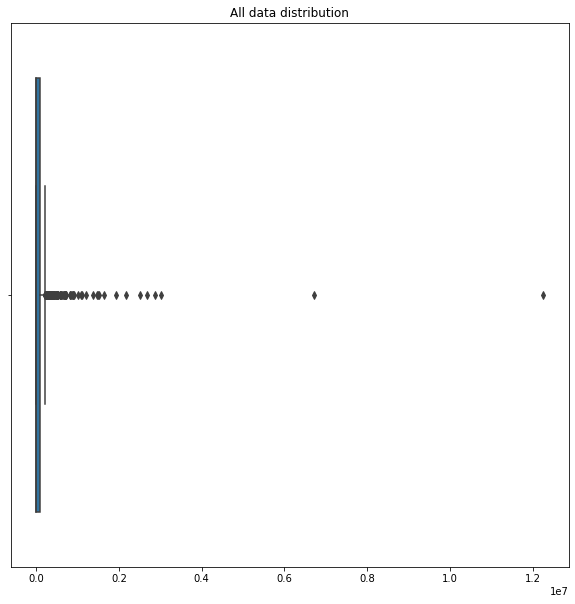

In [21]:
g += 1
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=col1,
    data=df
)
plt.title('All data distribution')
# plt.savefig('data\\results\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

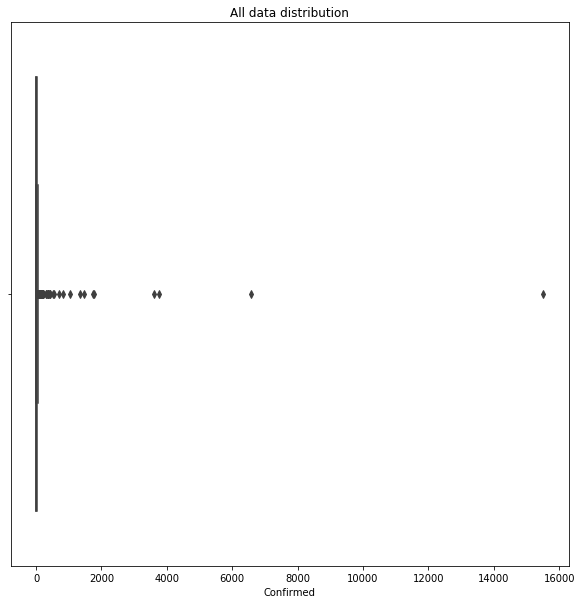

In [9]:
g += 1
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=col2,
    data=df
)
plt.title('All data distribution')
plt.savefig('data\\results\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

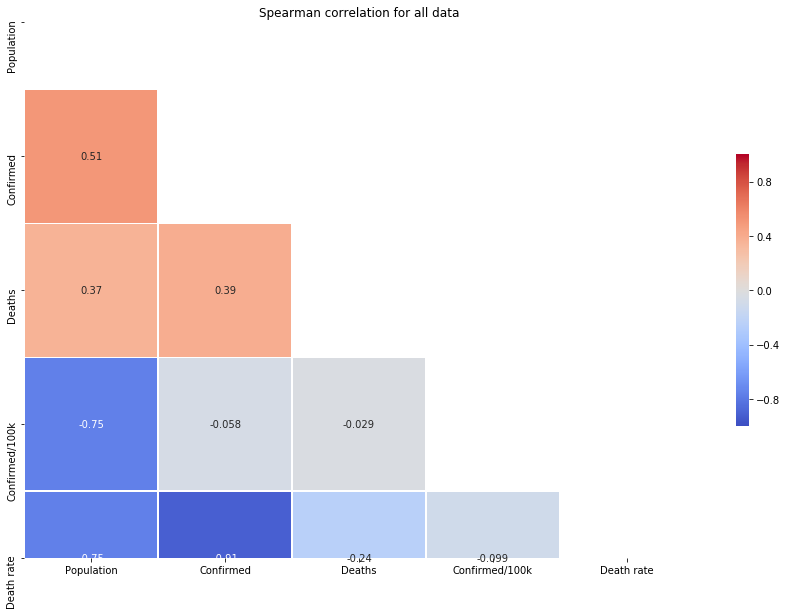

In [10]:
g += 1
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for all data')
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

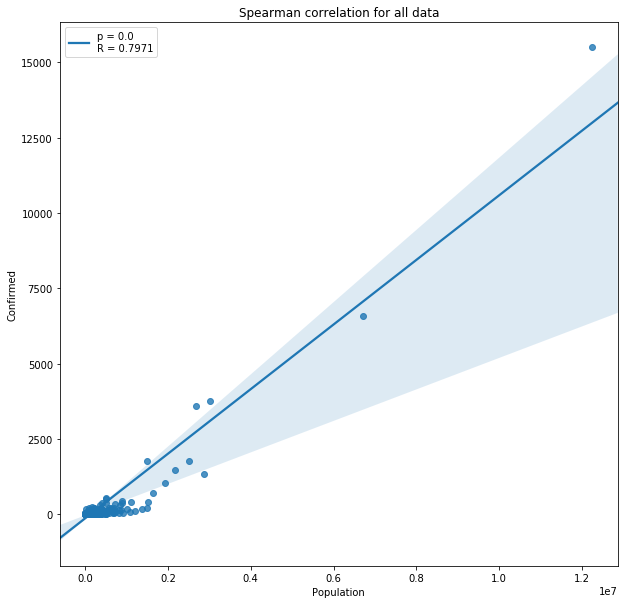

In [11]:
g += 1
df_mold = df.dropna()
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

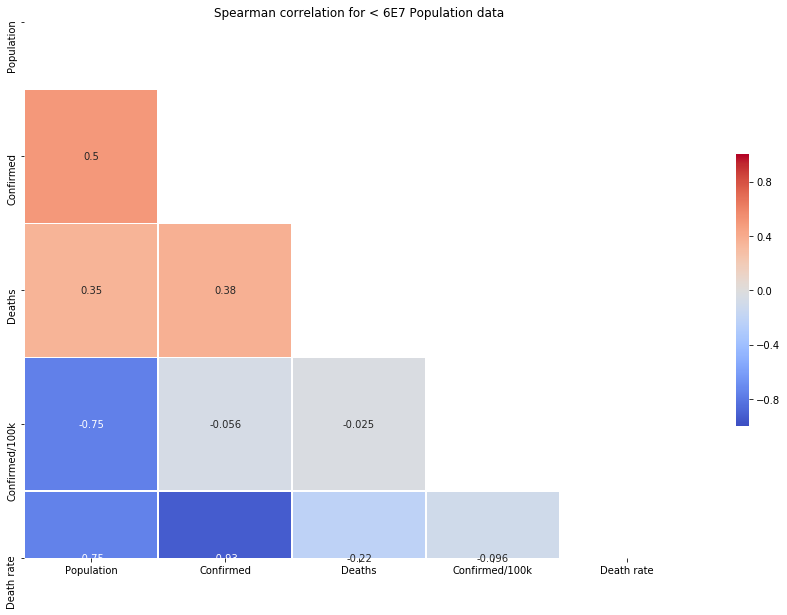

In [12]:
g += 1
df_mod = df[df['Population'] < 6000000]
corr = df_mod.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for < 6E7 '+col1+' data')
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

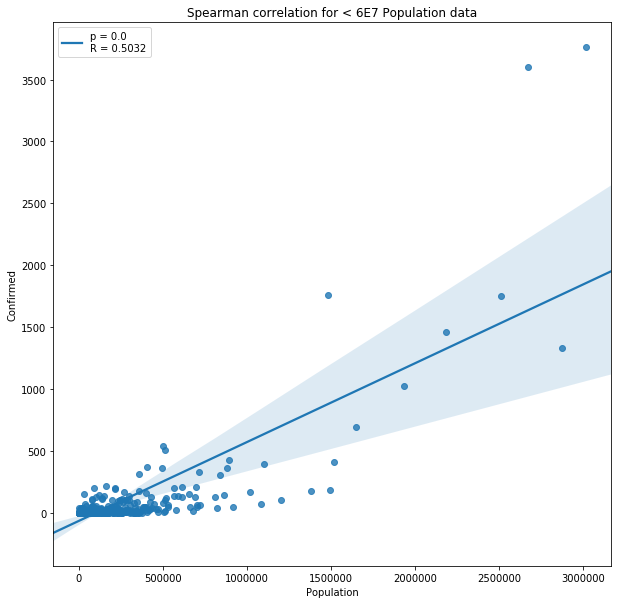

In [13]:
g += 1
df_mold = df_mod
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for < 6E7 '+col1+' data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [14]:
minimus = df[col1].min()
maximus = df[col1].max()
q2 = df[col1].median()
q1 = df[df[col1] < q2][col1].median()
q3 = df[df[col1] > q2][col1].median()
qi = q3 - q1
minor = q1 - (qi * 1.5)
major = q3 + (qi * 1.5)
list_quartil = {
    'minimus': minimus,
    'minor': minor,
    'q1': q1,
    'q2': q2,
    'q3': q3,
    'major': major,
    'maximus': maximus,
    'qi': qi
}
for k, v in list_quartil.items():
    print(f'{k} - {v}')

minimus - 1930.0
minor - -234117.5
q1 - 33817.0
q2 - 87402.0
q3 - 212440.0
major - 480374.5
maximus - 12252023.0
qi - 178623.0


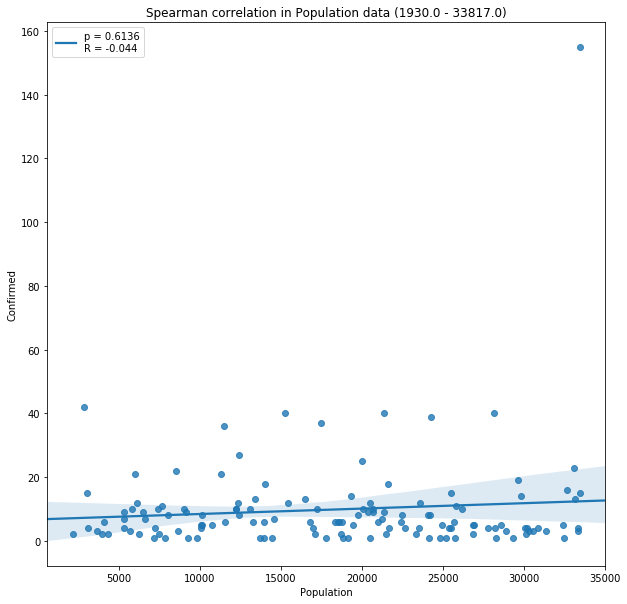

In [15]:
g += 1
inic = minimus
end = q1
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

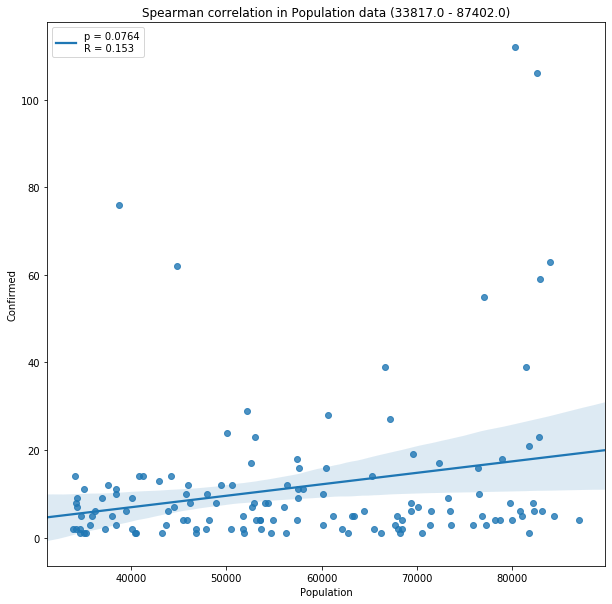

In [16]:
g += 1
inic = q1
end = q2
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

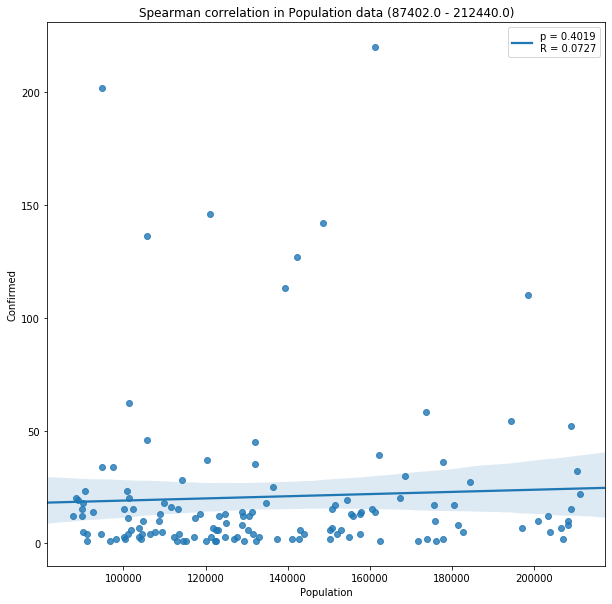

In [17]:
g += 1
inic = q2
end = q3
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

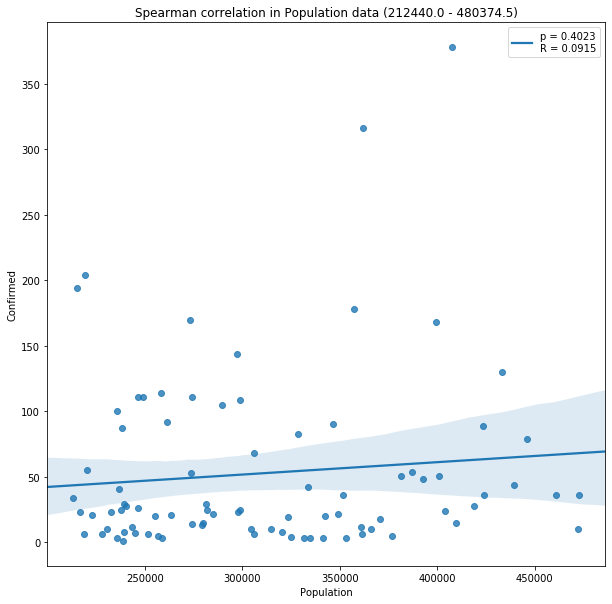

In [18]:
g += 1
inic = q3
end = major
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

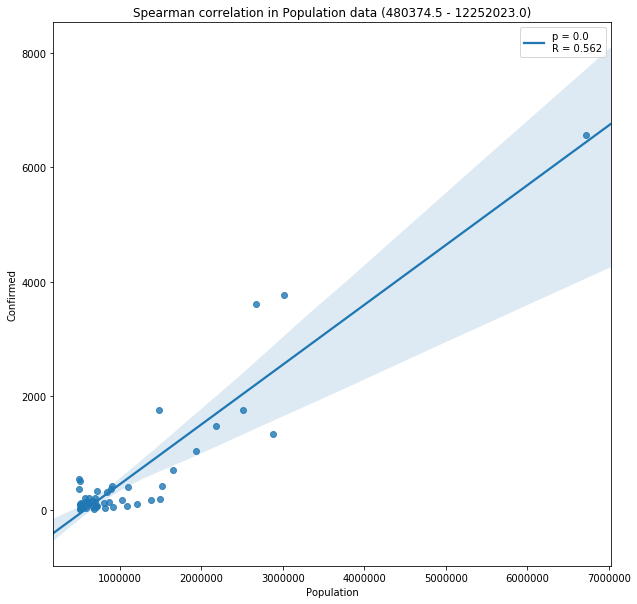

In [19]:
g += 1
inic = major
end = maximus
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
plt.savefig('data\\results\\'+col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)